In [1]:
# Importing the libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# Checking the statistical values of the dataset
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# Checking the shape of the data
df.shape

(4340, 8)

In [6]:
# Checking the missing values in the dataset
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

##### Univariate Analysis

In [7]:
# Dropping the unique identifier column from the data
print("Shape before dropping : {}".format(df.shape))
df.drop('name', axis = 1, inplace = True)
print("Shape after dropping : {}".format(df.shape))

Shape before dropping : (4340, 8)
Shape after dropping : (4340, 7)


In [8]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

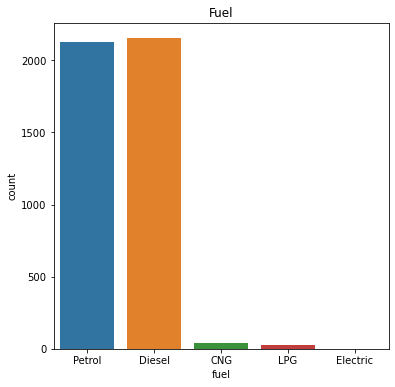

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(df.fuel)
plt.title('Fuel')
plt.show()

In [11]:
df['fuel'].value_counts()/len(df)*100

Diesel      49.608295
Petrol      48.917051
CNG          0.921659
LPG          0.529954
Electric     0.023041
Name: fuel, dtype: float64

In [12]:
data = df[(df.fuel == 'Diesel') | (df.fuel == 'Petrol')]
data.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,2015,850000,25000,Petrol,Individual,Manual,First Owner
10,2015,260000,35000,Petrol,Individual,Manual,First Owner


In [13]:
data.fuel = data.fuel.map({'Petrol': 1, 'Diesel': 0})
data.fuel

0       1
1       1
2       0
3       1
4       0
       ..
4335    0
4336    0
4337    1
4338    0
4339    1
Name: fuel, Length: 4276, dtype: int64

In [14]:
data.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

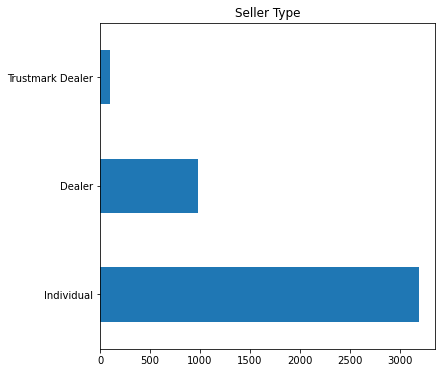

In [15]:
plt.figure(figsize=(6,6))
data['seller_type'].value_counts().plot.barh()
plt.title('Seller Type')
plt.show()

In [16]:
data['seller_type'].value_counts()/len(data)*100

Individual          74.625819
Dealer              22.988775
Trustmark Dealer     2.385407
Name: seller_type, dtype: float64

In [17]:
# Dummification for the seller_type column
dummy_df = pd.get_dummies(data['seller_type'], prefix='SellerType')
print('Shape before droppng: {}'.format(data.shape))
data.drop('seller_type', axis = 1, inplace = True)
print('Shape after droppng: {}'.format(data.shape))
dummy_df.head()

Shape before droppng: (4276, 7)
Shape after droppng: (4276, 6)


,SellerType_Dealer,SellerType_Individual,SellerType_Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [18]:
data = pd.concat([data, dummy_df], axis = 1)
data.head()

,year,selling_price,km_driven,fuel,transmission,owner,SellerType_Dealer,SellerType_Individual,SellerType_Trustmark Dealer
0,2007,60000,70000,1,Manual,First Owner,0,1,0
1,2007,135000,50000,1,Manual,First Owner,0,1,0
2,2012,600000,100000,0,Manual,First Owner,0,1,0
3,2017,250000,46000,1,Manual,First Owner,0,1,0
4,2014,450000,141000,0,Manual,Second Owner,0,1,0


In [19]:
data.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [21]:
data.transmission.value_counts()/len(data)*100

Manual       89.546305
Automatic    10.453695
Name: transmission, dtype: float64

In [22]:
data.transmission = data.transmission.map({'Manual': 1, 'Automatic': 0})
data.head()

,year,selling_price,km_driven,fuel,transmission,owner,SellerType_Dealer,SellerType_Individual,SellerType_Trustmark Dealer
0,2007,60000,70000,1,1,First Owner,0,1,0
1,2007,135000,50000,1,1,First Owner,0,1,0
2,2012,600000,100000,0,1,First Owner,0,1,0
3,2017,250000,46000,1,1,First Owner,0,1,0
4,2014,450000,141000,0,1,Second Owner,0,1,0


In [25]:
data.owner.value_counts()/len(data)*100

First Owner             65.505145
Second Owner            25.280636
Third Owner              7.015903
Fourth & Above Owner     1.800748
Test Drive Car           0.397568
Name: owner, dtype: float64

##### Replace the class labels 3,4,5 with the string Others